In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
dataset = pd.read_csv('datafile.csv')

In [6]:
X = dataset.iloc[:,[2,3]].values

In [11]:
y = dataset.iloc[:,4].values

In [12]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc = StandardScaler()

In [18]:
X_train = sc.fit_transform(X_train)

In [20]:
X_test = sc.transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
classifier = LogisticRegression(random_state=0)

In [23]:
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
y_pred = classifier.predict(X_test)

In [25]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [26]:
from sklearn.metrics import confusion_matrix

In [28]:
confusion_matrix(y_test, y_pred)

array([[ 0, 68],
       [ 0, 32]])

In [32]:
from matplotlib.colors import ListedColormap

In [33]:
def draw(X_set, y_set, title):
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.5, cmap=ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c=ListedColormap(('red', 'green'))(i), label=j)
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

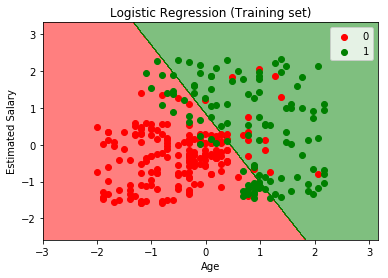

In [36]:
draw(X_train, y_train, 'Logistic Regression (Training set)')